In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1WdrjrDmyRlIvXhtSlwwcmqEwjg966qRp"})   # replace the id with id of file you want to access
downloaded2 = drive.CreateFile({'id':"1vN5qL2Rpd4Fuw2yNe26zLEVt1GU5cYuu"})
downloaded1.GetContentFile('fashion-mnist_train.csv')        # replace the file name with your file
downloaded2.GetContentFile('fashion-mnist_test.csv')        # replace the file name with your file


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


**Assignment 8 (3 Marks)**
1. Make a Neural network by using Tensorflow to find the image label with high accuracy. Report accuracy in both training and test sets. Input layer should have 784 units and output layer should have 10 units. (2)

2. By having a single RELU unit in the output layer, try to find the label of the set using a regression approach. (1)

The codes below are just to help you understand the data structure. Please take guidance from Assignement 6 on the way to proceed.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random;

In [ ]:
fashion_Train = pd.read_csv('fashion-mnist_train.csv')
fashion_Train = shuffle(fashion_Train)

In [ ]:
fashion_Test = pd.read_csv('fashion-mnist_test.csv')
fashion_Test = shuffle(fashion_Test)

In [ ]:
fashion_Train_Y = np.array(fashion_Train['label']);
fashion_Test_Y = np.array(fashion_Test['label']);

In [ ]:
fashion_Train_X = fashion_Train.drop(columns = 'label')
fashion_Test_X = fashion_Test.drop(columns = 'label')

fashion_Train_X=fashion_Train_X/255.0 #normalisation of data
fashion_Test_X/=255.0


In [ ]:
#fashion_Train_X

In [ ]:
fashion_Train_X.iloc[[0]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
45279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45098,0.129412,0.117647,0.058824,0.062745,0.101961,0.12549,0.313725,0.0,0.0,0.0,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160784,0.756863,0.827451,...,0.6,0.643137,0.615686,0.705882,0.545098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.345098,0.470588,0.45098,0.501961,0.576471,0.666667,0.666667,0.619608,0.580392,0.560784,0.52549,0.521569,0.509804,0.223529,0.0,0.003922,0.007843,0.0,0.0,0.0,0.0


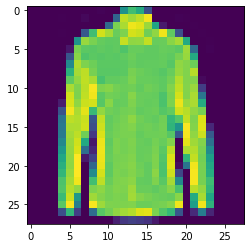

In [ ]:
plt.imshow(np.array(fashion_Train_X.iloc[2]).reshape(28,28))

In [ ]:
np.array(fashion_Train_X.iloc[[0]]).reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45098039, 0.12941176, 0.11764706, 0.05882353, 0.0627451 ,
        0.10196078, 0.1254902 , 0.31372549, 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16078431,
        0.75686275, 0.82745098, 0.52156863, 0.48627451, 0.57254902,
        0.49019608, 0.68235294, 0.85098039, 0.14509804, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.16470588, 0.35294118, 0.45490196, 0.42352941,
        0.38431373, 0.61960784, 0.80784314, 0.83529412, 0.84705882,
        0.83137255, 0.7725

Text(0.5, 1.0, '0')

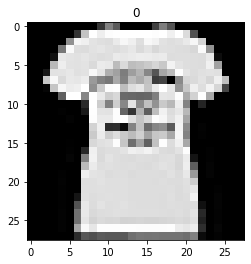

In [ ]:
image_Index = 49; # You may change this index and see the images below and values in next two blocks
plt.imshow(np.array(fashion_Train_X.iloc[[image_Index]]).reshape(28,28), cmap = 'gray')
plt.title(fashion_Train_Y[image_Index])

In [ ]:
fashion_Train_Y[image_Index]

0

In [ ]:
#Question 1
input_img=Input(shape=(784,))                      #Input layer with 784 neurons  
x=Dense(300,activation=tf.nn.relu)(input_img)   #1st hidden layer with 300 neurons
x=Dense(100,activation=tf.nn.relu)(x)           #2nd hidden layer with 100 neurons
output=Dense(10,activation=tf.nn.sigmoid)(x)       #Output layer with 10 neurons 
fashion_model=Model(input_img,output)              #Defining the Model
fashion_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fashion_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])  #Compiling the Model
fashion_model.fit(fashion_Train_X,fashion_Train_Y,epochs=40,validation_data=(fashion_Test_X,fashion_Test_Y))   #Fitting the model and testing its accuracy on the test set

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.8222 - val_loss: 0.3759 - val_accuracy: 0.8668
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3733 - accuracy: 0.8648 - val_loss: 0.3574 - val_accuracy: 0.8719
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8766 - val_loss: 0.3307 - val_accuracy: 0.8806
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3109 - accuracy: 0.8848 - val_loss: 0.3220 - val_accuracy: 0.8836
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2946 - accuracy: 0.8922 - val_loss: 0.3264 - val_accuracy: 0.8775
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2760 - accuracy: 0.8962 - val_loss: 0.3201 - val_accuracy: 0.8818
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2643 - accuracy: 0.9003 - val_loss: 0.3088 - val_accuracy:

**We are able to get 95.60% accuracy on the Test set and 90.23% accuracy on Training set.**




In [ ]:
#Question 2
input_vector=Input(shape=(784,))                      #Input layer with 784 neurons  
x=Dense(128,activation=tf.nn.relu)(input_vector)   #1st hidden layer with 128 neurons
x=Dense(128,activation=tf.nn.relu)(x)                 #2nd hidden layer with 128 neurons
x=Dense(64,activation=tf.nn.relu)(x)               #3rd hidden layer with 64 neurons
output_relu=Dense(1,activation=tf.nn.relu)(x)        #Output layer with 1 neuron 
fashion_model_relu=Model(input_vector,output_relu)              #Defining the Model
fashion_model_relu.compile(optimizer="adam", loss="mean_squared_error",metrics=["mse","accuracy"])  #Compiling the Model
fashion_model_relu.fit(fashion_Train_X,fashion_Train_Y,epochs=200,validation_data=(fashion_Test_X,fashion_Test_Y))   #Fitting the model and testing its accuracy on the test set

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9408 - mse: 1.9408 - accuracy: 0.1312 - val_loss: 1.6409 - val_mse: 1.6409 - val_accuracy: 0.1442
Epoch 2/200
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4089 - mse: 1.4089 - accuracy: 0.1408 - val_loss: 1.4272 - val_mse: 1.4272 - val_accuracy: 0.1536
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2632 - mse: 1.2632 - accuracy: 0.1413 - val_loss: 1.3042 - val_mse: 1.3042 - val_accuracy: 0.1411
Epoch 4/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1685 - mse: 1.1685 - accuracy: 0.1474 - val_loss: 1.2484 - val_mse: 1.2484 - val_accuracy: 0.1607
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1184 - mse: 1.1184 - accuracy: 0.1477 - val_loss: 1.2375 - val_mse: 1.2375 - val_accuracy: 0.1299
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0789 - mse: 1.0789 - accuracy: 0.146

We are able to get **19.51%** accuracy on the Test set and **17.77%** accuracy on Training set on even 200 epochs when we use **single unit** relu function as the activation function. This shows **we can't solve classification problems with regression** and hence, getting such a low accuracy.

